# LOGISTIC REGRESSION

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 1. Data Exploration:

In [4]:
titanic = pd.read_csv("Titanic_train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.info()
# Here we can see that the dataset has 891 rows and 12 columns. The columns include PassengerId, Survived, Pclass, Name
# sex, Age, SibSp, Parch, Ticket, Fare, Cabin, and Embarked. The Survived column is the target variable, indicating whether a passenger survived (1) or not (0).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic.shape

(891, 12)

In [8]:
# Find the null values in the dataset
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
titanic.isnull().sum().sum()

np.int64(866)

In [10]:
# unique values in the Embarked column
titanic.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [11]:
# No of passengers who survived and did not survive
titanic.groupby('Survived')['PassengerId'].count()

Survived
0    549
1    342
Name: PassengerId, dtype: int64

Visualization

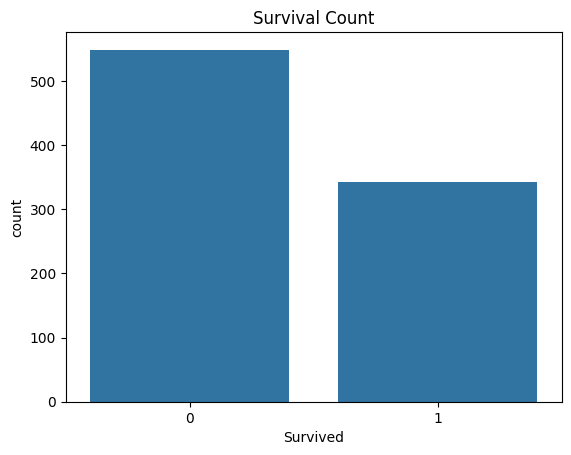

In [12]:
# Visualization of Survival count
sns.countplot(x='Survived', data=titanic)
plt.title('Survival Count')
plt.show()

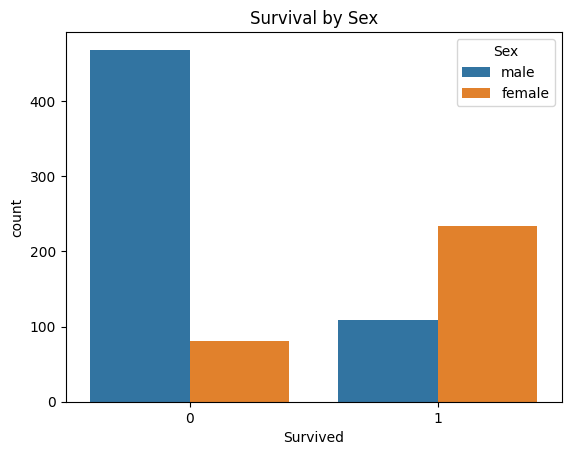

In [13]:
# Survival by Sex
sns.countplot(x='Survived', hue='Sex', data=titanic)
plt.title('Survival by Sex')
plt.show()

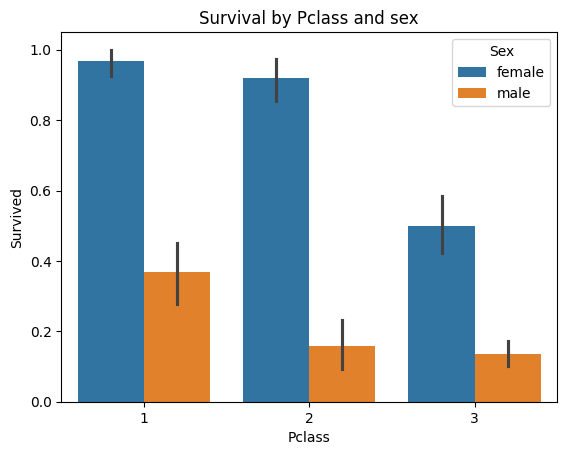

In [14]:
sns.barplot(x="Pclass", y="Survived",hue="Sex", data=titanic)
plt.title('Survival by Pclass and sex')
plt.show()

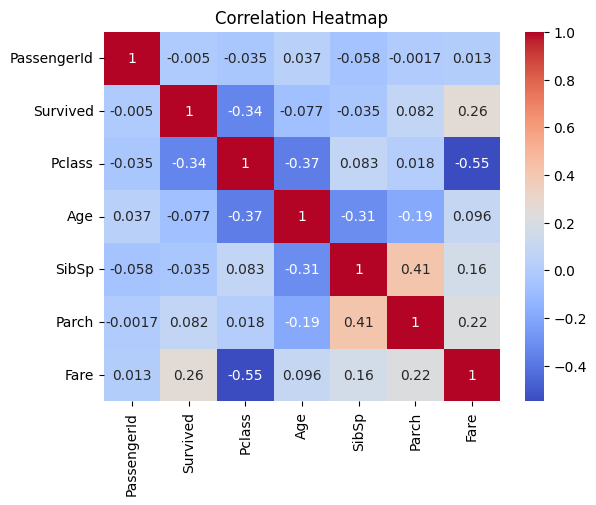

In [15]:
# Heatmap of correlation
sns.heatmap(titanic.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

patterns or correlations observed in the data

Pclass & Fare: -0.55 has Strong negative correlation.1st class passengers paid higher fares.

Pclass & Survived: -0.34 has Moderate negative correlation.Higher class passengers had better survival chances.

Fare & Survived: 0.26 has Slight positive correlation.Passengers who paid more were more likely to survive.

Pclass & Age: -0.37 has Moderate negative correlation.Younger passengers were mostly in lower classes.

SibSp & Parch: 0.41 has Moderate positive correlation.People traveling with siblings often had parents/children too.

Age & SibSp: -0.31 has Older passengers were less likely to travel with siblings/spouses.

Age & Survived: -0.077 has Very weak negative correlation.Younger passengers had a slightly higher chance of survival.


In [16]:
# Before we proceed with data preprocessing, let's store the original dataset for reference.
titanic_original = titanic.copy()

# 2. Data Preprocessing:

In [17]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


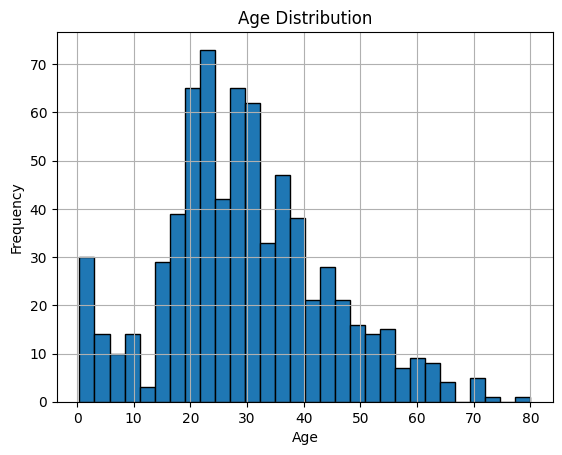

In [18]:
# Age distribution
titanic['Age'].hist(bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [19]:
# Fill missing values in Age with median
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

In [20]:
# Fill missing values in Embarked with mode
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

In [21]:
# Drop Unnecessary Columns
# Here we drop columns that are not useful for our analysis or modeling, such as PassengerId, Name, Ticket, and Cabin.
titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [22]:
#  Encode Categorical Variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [23]:
# Encode the Sex column and the Embarked column
label_encoder = LabelEncoder()
titanic['Embarked']= label_encoder.fit_transform(titanic['Embarked']) 

In [24]:
label_encoder = LabelEncoder()
titanic['Sex']= label_encoder.fit_transform(titanic['Sex']) 

In [25]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [26]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


# 3. Model Building: Using LogisticRegression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
# Dividing our data into input and output variables
X = titanic.iloc[:,1:]# all columns execpt Survived
Y = titanic.iloc[:,0]# only Survived because it is predicted column

In [29]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [30]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [31]:

classifier=LogisticRegression()
classifier.fit(X,Y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [32]:
y_pred = classifier.predict(X)
y_pred.reshape(-1, 1)

array([[0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
    

In [33]:
classifier.predict_proba(X)[:, 1] 

array([0.0939131 , 0.91852932, 0.62942677, 0.88695801, 0.07959866,
       0.11677058, 0.27135994, 0.10039669, 0.57876448, 0.90108156,
       0.72859412, 0.80776504, 0.13349029, 0.03486524, 0.72938435,
       0.6176586 , 0.09332491, 0.2342702 , 0.51030743, 0.69528235,
       0.20414723, 0.20588667, 0.76367101, 0.49450602, 0.55172574,
       0.3428481 , 0.14106345, 0.42017952, 0.64721155, 0.09585916,
       0.4846392 , 0.94799663, 0.64714842, 0.06998184, 0.54966645,
       0.30086724, 0.14106454, 0.12910046, 0.5557657 , 0.75402194,
       0.41984057, 0.77737749, 0.14123747, 0.92250654, 0.73470497,
       0.09588776, 0.08899796, 0.64714842, 0.08235227, 0.63208992,
       0.06518751, 0.12904032, 0.88192439, 0.76569597, 0.26102511,
       0.47816942, 0.85527073, 0.14675017, 0.87338993, 0.03881165,
       0.18091982, 0.91049994, 0.29084334, 0.08743076, 0.58298293,
       0.10000559, 0.81284809, 0.13803331, 0.36014021, 0.0609203 ,
       0.21784525, 0.31637352, 0.32738184, 0.12279134, 0.09720

In [34]:
y_pred_titanic= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict_proba(X)[:,1],
                         'y_predictions':y_pred})

In [35]:
y_pred_titanic

,actual,predicted_prob,y_predictions
0,0,0.093913,0
1,1,0.918529,1
2,1,0.629427,1
3,1,0.886958,1
4,0,0.079599,0
...,...,...,...
886,0,0.253419,0
887,1,0.949984,1
888,0,0.480645,0
889,1,0.618289,1


Model Building: Using train_test_split

In [36]:
# Store the titanic dataset copy in df
df = titanic.copy()

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [39]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,1,45.500000,0,0,28.5000,2
733,2,1,23.000000,0,0,13.0000,2
382,3,1,32.000000,0,0,7.9250,2
704,3,1,26.000000,1,0,7.8542,2
813,3,0,6.000000,4,2,31.2750,2
...,...,...,...,...,...,...,...
106,3,0,21.000000,0,0,7.6500,2
270,1,1,29.699118,0,0,31.0000,2
860,3,1,41.000000,2,0,14.1083,2
435,1,0,14.000000,1,2,120.0000,2


In [40]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
709,3,1,29.699118,1,1,15.2458,0
439,2,1,31.000000,0,0,10.5000,2
840,3,1,20.000000,0,0,7.9250,2
720,2,0,6.000000,0,1,33.0000,2
39,3,0,14.000000,1,0,11.2417,0
...,...,...,...,...,...,...,...
433,3,1,17.000000,0,0,7.1250,2
773,3,1,29.699118,0,0,7.2250,0
25,3,0,38.000000,1,5,31.3875,2
84,2,0,17.000000,0,0,10.5000,2


In [41]:
# Ensure consistent columns
X_test = X_test[X_train.columns]

# OR drop any new columns added later
X_test = X_test.drop(columns=['predicted_prob'], errors='ignore')

# Then predict
y_pred_df = model.predict(X_test)


In [42]:
y_pred_df

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [43]:
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_df
})

print(results.head(10))  

     Actual  Predicted
709       1          0
439       0          0
840       0          0
720       1          1
39        1          1
290       1          1
300       1          1
333       0          0
208       1          1
136       1          1


# 4.model Evaluation:

To Evaluate the model we use Confusion Matrix
A confusion matrix is a table used to evaluate the performance of a classification model by summarizing the number of correct and incorrect predictions for each class. It helps in understanding how a model gets confused between different classes and where it makes errors.

Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.

In [44]:
#Confusion Matrix for Logistic Regression model
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, roc_auc_score, roc_curve

In [45]:
confusion_matrix = confusion_matrix(Y, y_pred)
print(confusion_matrix)

[[473  76]
 [102 240]]


In [46]:
# Classification Report for Linear Regression model
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       549
           1       0.76      0.70      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891



In [47]:
classifier.score(X, Y)

0.8002244668911336

In [48]:
# Recall, Precision, F1 Score, and Support
from sklearn.metrics import recall_score, precision_score, f1_score

In [49]:
# Recall
recall = recall_score(Y, y_pred)
print(f"Recall: {recall}")

Recall: 0.7017543859649122


In [50]:
# Precision
precision = precision_score(Y, y_pred)
print(f"Precision: {precision}")

Precision: 0.759493670886076


In [51]:
# f1 Score
f1 = f1_score(Y, y_pred)
print(f"F1 Score: {f1}")

F1 Score: 0.729483282674772


In [52]:
# Accuracy
Accuracy= accuracy_score(Y,y_pred) * 100
print(f"Accuracy: {Accuracy:.2f}%")

Accuracy: 80.02%


In [53]:
#ROC_AUC Score
roc_auc = roc_auc_score(Y, y_pred)
print(f"ROC_AUC Score: {roc_auc:.2f}")

ROC_AUC Score: 0.78


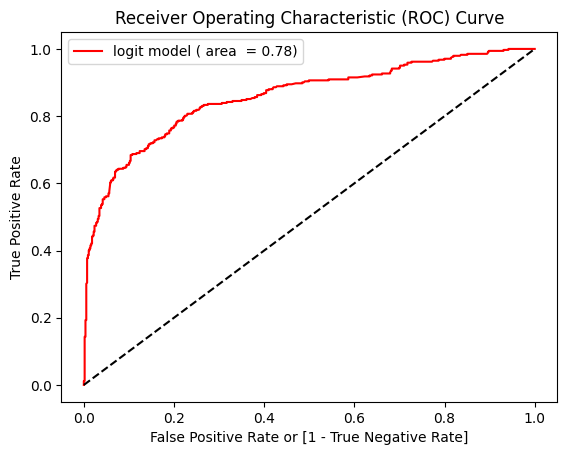

In [54]:
# Visualize the ROC curve
fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])
#fpr=1-specificity or false positive rate
# tpr=true positive rate
auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()

# 5. Interpretation:

In [56]:
# Interpret the coefficients of the logistic regression model.
import numpy as np
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0],
    'Odds Ratio': np.exp(model.coef_[0])
}).sort_values(by='Coefficient', ascending=False)

print(coeff_df)


    Feature  Coefficient  Odds Ratio
5      Fare     0.002499    1.002503
2       Age    -0.031150    0.969330
4     Parch    -0.115943    0.890526
6  Embarked    -0.223513    0.799705
3     SibSp    -0.295562    0.744113
0    Pclass    -0.931850    0.393825
1       Sex    -2.597233    0.074479


Significance of Features 
Feature	Coefficient	Interpretation
Sex_male	 -2.6	Being male decreases the chance of survival significantly.
Pclass	     -0.9	Higher class (1st) increases survival odds; lower class reduces it.
Fare	     +0.01	Higher fare is associated with better survival chances.
Age	         -0.02	Older passengers were slightly less likely to survive.
Embarked_Q	 -0.4	Embarking at Queenstown reduced survival odds (relative to Cherbourg).
Embarked_S	 -0.3	Embarking at Southampton also reduced survival odds.

In [57]:
import joblib

# Save model
joblib.dump(model, "logistic_model.pkl")


['logistic_model.pkl']